In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import pygal
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv('datasets/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.shape

(39644, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

## Análisis Exploratorio

In [6]:
df.describe(percentiles=[.01, .25, .5, .75, .99])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,"39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00"
mean,354.53,10.40,546.51,0.55,1.00,0.69,10.88,3.29,4.54,1.25,4.55,7.22,0.05,0.18,0.16,0.06,0.19,0.21,26.11,"1,153.95",312.37,"13,612.35","752,324.07","259,281.94","1,117.15","5,657.21","3,135.86","3,998.76","10,329.21","6,401.70",0.17,0.19,0.19,0.18,0.14,0.06,0.07,0.13,0.18,0.14,0.22,0.22,0.23,0.44,0.12,0.04,0.02,0.68,0.29,0.35,0.10,0.76,-0.26,-0.52,-0.11,0.28,0.07,0.34,0.16,"3,395.38"
std,214.16,2.11,471.11,3.52,5.23,3.26,11.33,3.86,8.31,4.11,0.84,1.91,0.22,0.38,0.36,0.23,0.39,0.41,69.63,"3,857.99",620.78,"57,986.03","214,502.13","135,102.25","1,137.46","6,098.87","1,318.15","19,738.67","41,027.58","24,211.33",0.37,0.39,0.39,0.39,0.35,0.24,0.25,0.34,0.26,0.22,0.28,0.30,0.29,0.12,0.10,0.02,0.01,0.19,0.16,0.10,0.07,0.25,0.13,0.29,0.10,0.32,0.27,0.19,0.23,"11,626.95"
min,8.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,0.00,1.00
1%,17.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,"37,400.00","13,040.17",0.00,"2,561.22","1,339.83",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.62,-1.00,-0.50,0.00,-0.70,0.00,0.00,381.00
25%,164.00,9.00,246.00,0.47,1.00,0.63,4.00,1.00,1.00,0.00,4.48,6.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,445.00,141.75,0.00,"843,300.00","172,846.88",0.00,"3,562.10","2,382.45",639.00,"1,100.00",981.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.03,0.03,0.40,0.06,0.03,0.01,0.60,0.19,0.31,0.05,0.60,-0.33,-0.70,-0.12,0.00,0.00,0.17,0.00,946.00
50%,339.00,10.00,409.00,0.54,1.00,0.69,8.00,3.00,1.00,0.00,4.66,7.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,660.00,235.50,"1,400.00","843,300.00","244,572.22","1,023.64","4,355.69","2,870.07","1,200.00","2,800.00","2,200.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.04,0.04,0.04,0.45,0.12,0.04,0.02,0.71,0.28,0.36,0.10,0.80,-0.25,-0.50,-0.10,0.15,0.00,0.50,0.00,"1,400.00"
75%,542.00,12.00,716.00,0.61,1.00,0.75,14.00,4.00,4.00,

Buscamos valores nulos en el dataset

In [7]:
pd.DataFrame(df.isnull().sum()).sort_values(by=0, ascending=False)

,0
url,0
weekday_is_monday,0
weekday_is_wednesday,0
weekday_is_thursday,0
weekday_is_friday,0
...,...
kw_min_avg,0
kw_max_avg,0
kw_avg_avg,0
self_reference_min_shares,0


In [8]:
df.columns = [ x.strip() for x in df.columns ]
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [9]:
df.describe(include=['object'])

,url
count,39644
unique,39644
top,http://mashable.com/2013/01/07/amazon-instant-...
freq,1


In [10]:
df.describe(exclude=['object'], percentiles=[.01, .25, .5, .75, .99])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,"39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00","39,644.00"
mean,354.53,10.40,546.51,0.55,1.00,0.69,10.88,3.29,4.54,1.25,4.55,7.22,0.05,0.18,0.16,0.06,0.19,0.21,26.11,"1,153.95",312.37,"13,612.35","752,324.07","259,281.94","1,117.15","5,657.21","3,135.86","3,998.76","10,329.21","6,401.70",0.17,0.19,0.19,0.18,0.14,0.06,0.07,0.13,0.18,0.14,0.22,0.22,0.23,0.44,0.12,0.04,0.02,0.68,0.29,0.35,0.10,0.76,-0.26,-0.52,-0.11,0.28,0.07,0.34,0.16,"3,395.38"
std,214.16,2.11,471.11,3.52,5.23,3.26,11.33,3.86,8.31,4.11,0.84,1.91,0.22,0.38,0.36,0.23,0.39,0.41,69.63,"3,857.99",620.78,"57,986.03","214,502.13","135,102.25","1,137.46","6,098.87","1,318.15","19,738.67","41,027.58","24,211.33",0.37,0.39,0.39,0.39,0.35,0.24,0.25,0.34,0.26,0.22,0.28,0.30,0.29,0.12,0.10,0.02,0.01,0.19,0.16,0.10,0.07,0.25,0.13,0.29,0.10,0.32,0.27,0.19,0.23,"11,626.95"
min,8.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,0.00,1.00
1%,17.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,"37,400.00","13,040.17",0.00,"2,561.22","1,339.83",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.62,-1.00,-0.50,0.00,-0.70,0.00,0.00,381.00
25%,164.00,9.00,246.00,0.47,1.00,0.63,4.00,1.00,1.00,0.00,4.48,6.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,445.00,141.75,0.00,"843,300.00","172,846.88",0.00,"3,562.10","2,382.45",639.00,"1,100.00",981.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.03,0.03,0.40,0.06,0.03,0.01,0.60,0.19,0.31,0.05,0.60,-0.33,-0.70,-0.12,0.00,0.00,0.17,0.00,946.00
50%,339.00,10.00,409.00,0.54,1.00,0.69,8.00,3.00,1.00,0.00,4.66,7.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,660.00,235.50,"1,400.00","843,300.00","244,572.22","1,023.64","4,355.69","2,870.07","1,200.00","2,800.00","2,200.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.04,0.04,0.04,0.45,0.12,0.04,0.02,0.71,0.28,0.36,0.10,0.80,-0.25,-0.50,-0.10,0.15,0.00,0.50,0.00,"1,400.00"
75%,542.00,12.00,716.00,0.61,1.00,0.75,14.00,4.00,4.00,

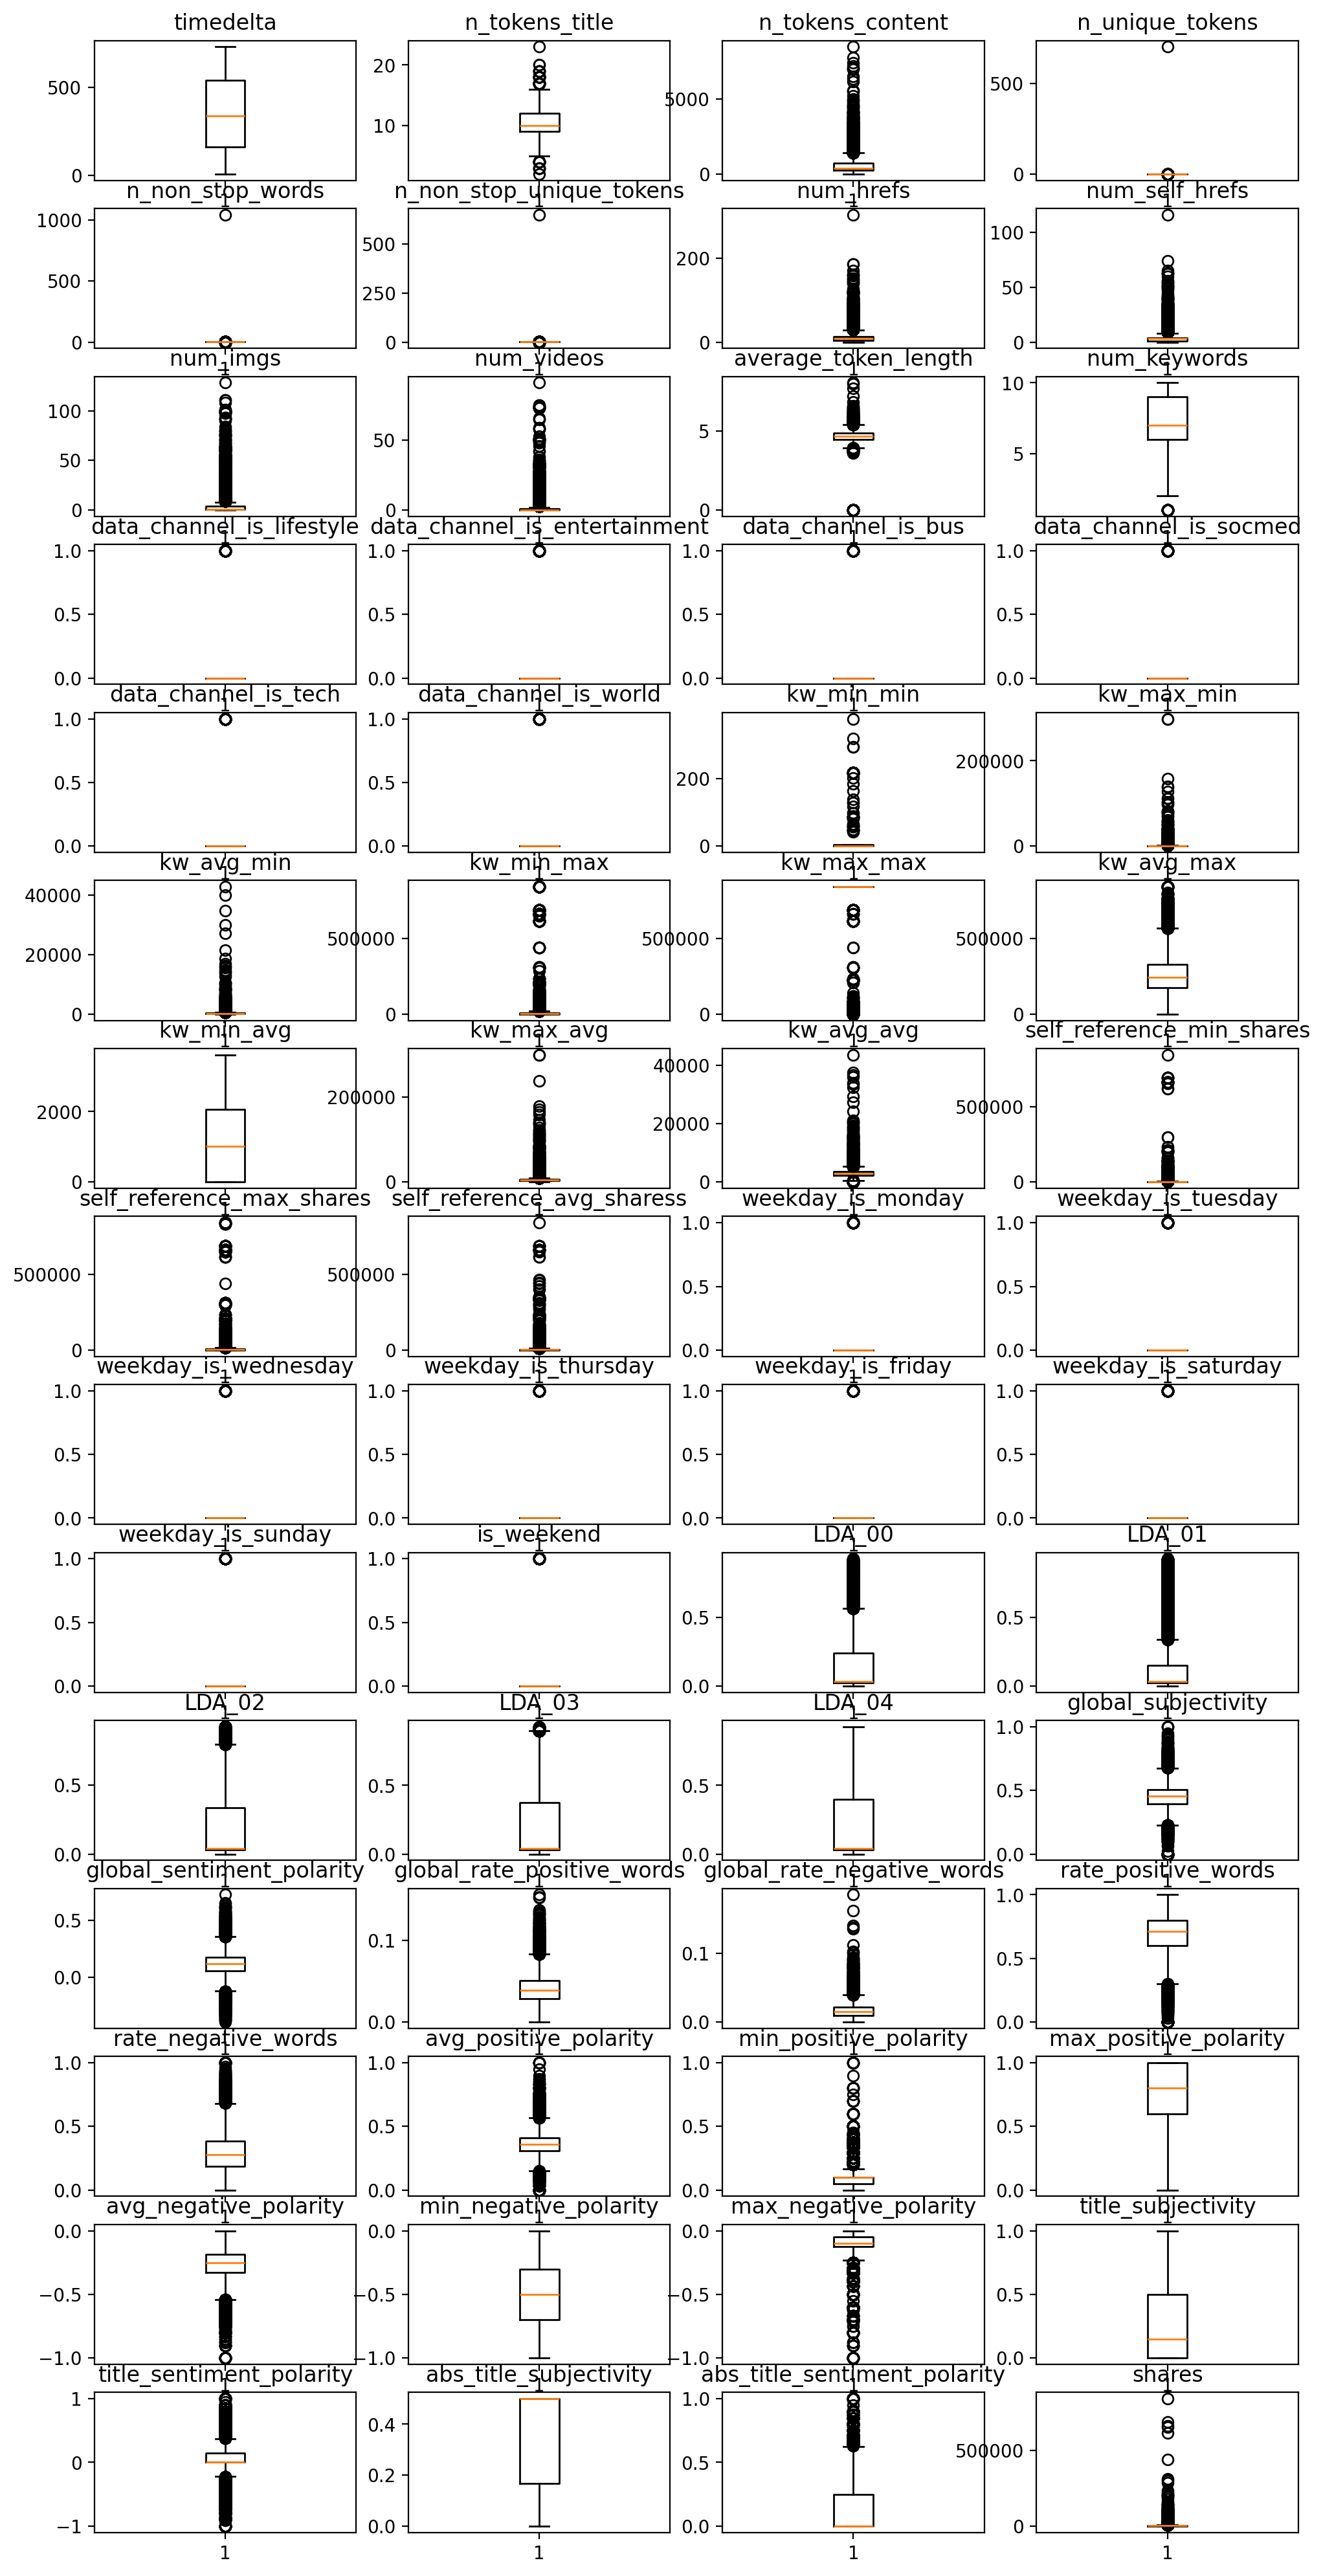

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = df.select_dtypes(exclude=['object']).columns.to_list()

n_cols = 4
n_rows = 15

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(12, 25))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break


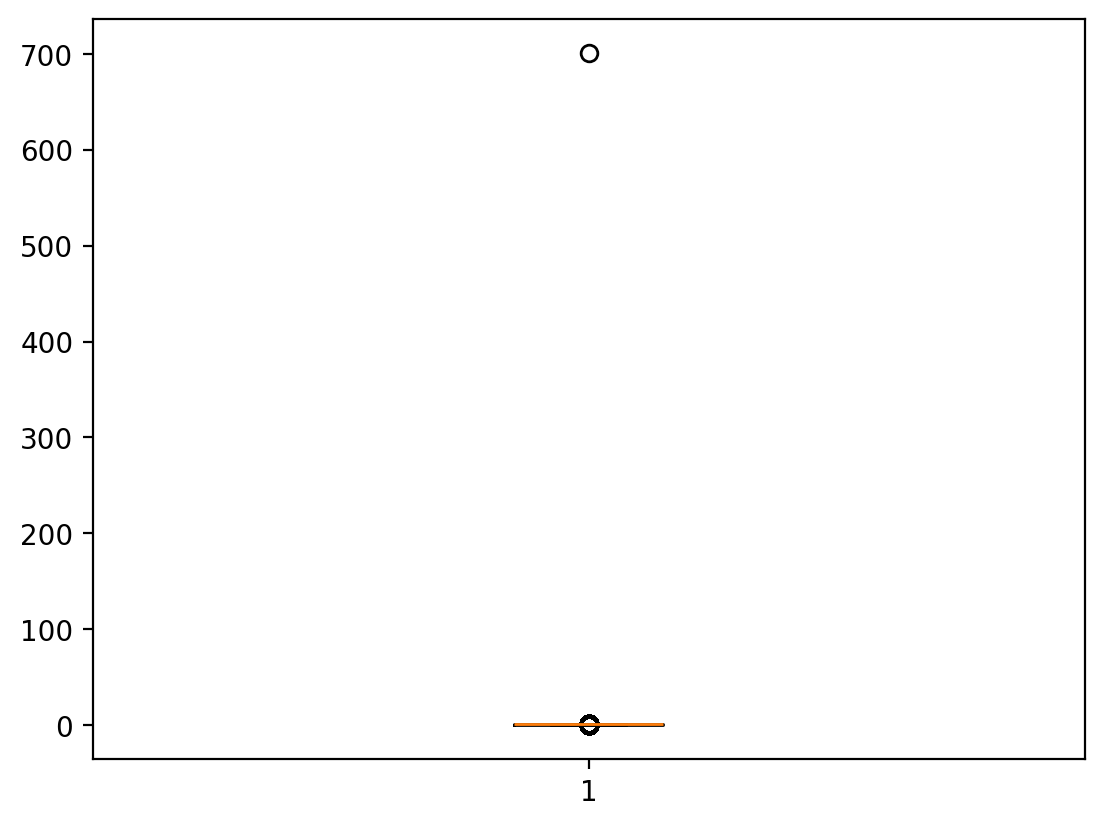

In [12]:
plt.boxplot(df['n_unique_tokens'])
plt.show()

In [13]:
print(df.shape)
df = df[df['n_unique_tokens'] < df['n_unique_tokens'].max()].reset_index(drop=True)
print(df.shape)
print(df['n_unique_tokens'].describe( percentiles=[.01, .25, .5, .75, .99] ))

(39644, 61)
(39643, 61)
count   39,643.00
mean         0.53
std          0.14
min          0.00
1%           0.00
25%          0.47
50%          0.54
75%          0.61
99%          0.80
max          1.00
Name: n_unique_tokens, dtype: float64


In [14]:
df.describe(exclude=['object'], percentiles=[.01, .25, .5, .75, .99])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,"39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00","39,643.00"
mean,354.54,10.40,546.49,0.53,0.97,0.67,10.88,3.29,4.54,1.25,4.55,7.22,0.05,0.18,0.16,0.06,0.19,0.21,26.11,"1,153.96",312.37,"13,612.11","752,321.77","259,280.14","1,117.11","5,657.27","3,135.86","3,998.84","10,329.47","6,401.68",0.17,0.19,0.19,0.18,0.14,0.06,0.07,0.13,0.18,0.14,0.22,0.22,0.23,0.44,0.12,0.04,0.02,0.68,0.29,0.35,0.10,0.76,-0.26,-0.52,-0.11,0.28,0.07,0.34,0.16,"3,395.32"
std,214.16,2.11,471.09,0.14,0.17,0.15,11.33,3.86,8.31,4.11,0.84,1.91,0.22,0.38,0.36,0.23,0.39,0.41,69.63,"3,858.04",620.79,"57,986.74","214,504.35","135,103.48","1,137.45","6,098.94","1,318.17","19,738.91","41,028.06","24,211.64",0.37,0.39,0.39,0.39,0.35,0.24,0.25,0.34,0.26,0.22,0.28,0.30,0.29,0.12,0.10,0.02,0.01,0.19,0.16,0.10,0.07,0.25,0.13,0.29,0.10,0.32,0.27,0.19,0.23,"11,627.09"
min,8.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,0.00,1.00
1%,17.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,"37,400.00","13,039.90",0.00,"2,561.22","1,339.82",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.62,-1.00,-0.50,0.00,-0.70,0.00,0.00,381.00
25%,164.00,9.00,246.00,0.47,1.00,0.63,4.00,1.00,1.00,0.00,4.48,6.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,445.00,141.75,0.00,"843,300.00","172,843.75",0.00,"3,562.10","2,382.44",639.00,"1,100.00",981.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.03,0.03,0.40,0.06,0.03,0.01,0.60,0.19,0.31,0.05,0.60,-0.33,-0.70,-0.12,0.00,0.00,0.17,0.00,946.00
50%,339.00,10.00,409.00,0.54,1.00,0.69,8.00,3.00,1.00,0.00,4.66,7.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,660.00,235.50,"1,400.00","843,300.00","244,566.67","1,023.62","4,355.69","2,870.05","1,200.00","2,800.00","2,200.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.04,0.04,0.04,0.45,0.12,0.04,0.02,0.71,0.28,0.36,0.10,0.80,-0.25,-0.50,-0.10,0.15,0.00,0.50,0.00,"1,400.00"
75%,542.00,12.00,716.00,0.61,1.00,0.75,14.00,4.00,4.00,

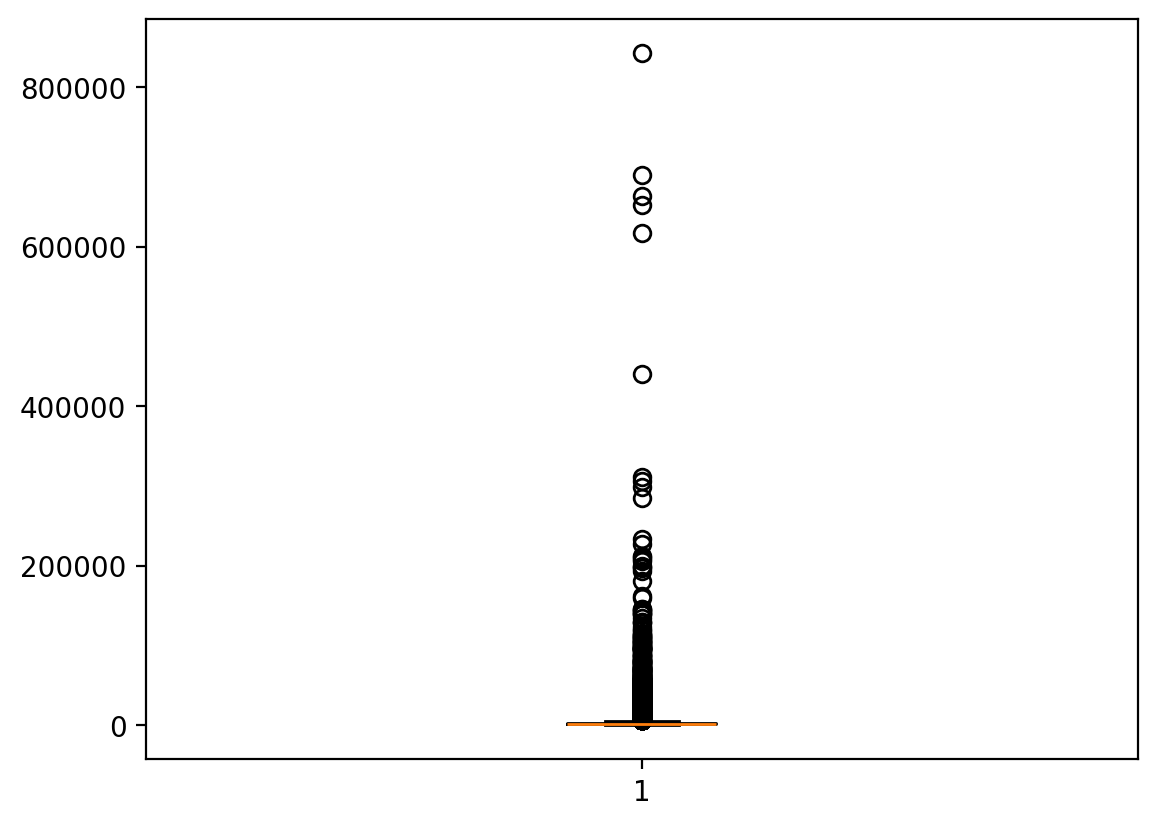

In [15]:
plt.boxplot(df['shares'])
plt.show()

In [16]:
print(df.shape)
print("99% : " + str(df['shares'].describe(percentiles=[.99]).T['99%']))
df = df[df['shares'] <= df['shares'].describe(percentiles=[.99]).T['99%']]
print(df.shape)
print(df['shares'].describe(percentiles=[.01, .25, .5, .75, .99]))

(39643, 61)
99% : 31658.000000000175
(39246, 61)
count   39,246.00
mean     2,682.79
std      3,647.00
min          1.00
1%         380.00
25%        942.00
50%      1,400.00
75%      2,700.00
99%     20,555.00
max     31,600.00
Name: shares, dtype: float64


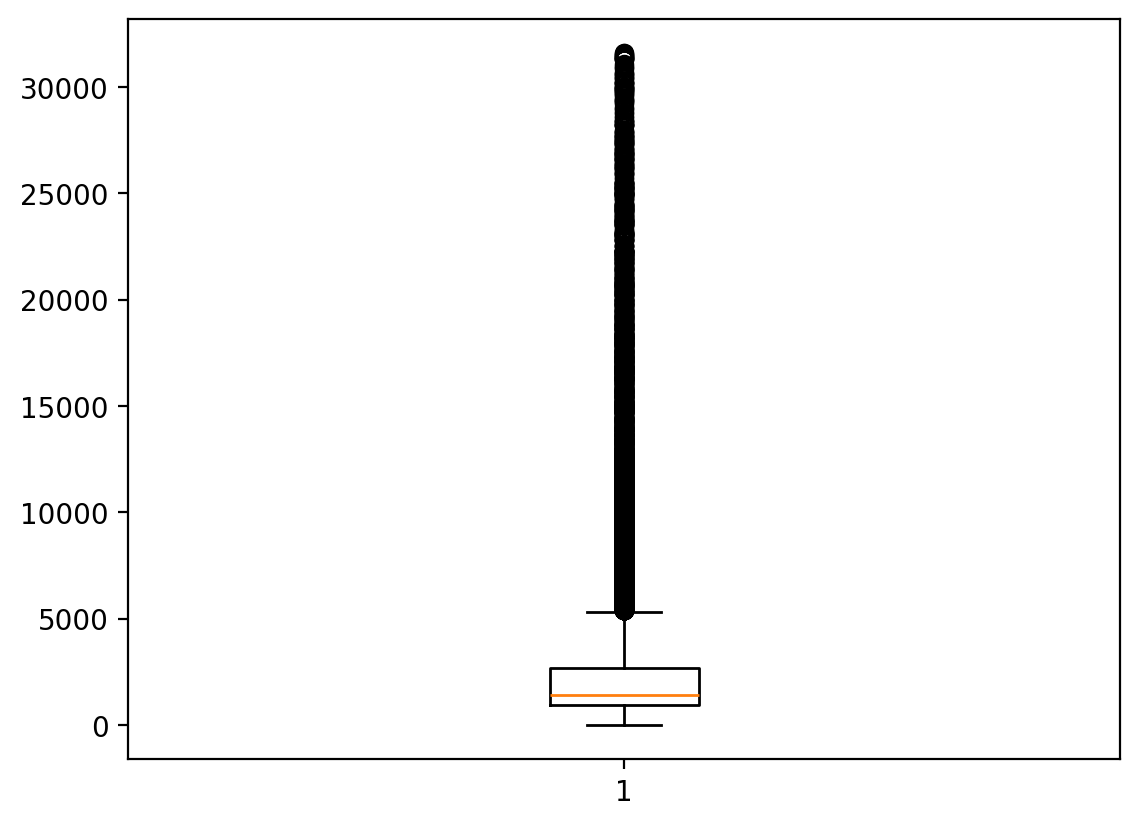

In [47]:
plt.boxplot(df['shares'])
plt.show()

In [17]:
df.describe(exclude=['object'], percentiles=[.01, .25, .5, .75, .99])

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,"39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00","39,246.00"
mean,354.76,10.40,546.84,0.53,0.97,0.67,10.84,3.30,4.52,1.24,4.55,7.22,0.05,0.18,0.16,0.06,0.19,0.21,26.16,"1,149.38",311.78,"13,565.93","751,995.87","258,703.38","1,114.34","5,629.09","3,125.08","3,942.85","10,200.64","6,320.13",0.17,0.19,0.19,0.18,0.14,0.06,0.07,0.13,0.19,0.14,0.22,0.22,0.23,0.44,0.12,0.04,0.02,0.68,0.29,0.35,0.10,0.76,-0.26,-0.52,-0.11,0.28,0.07,0.34,0.16,"2,682.79"
std,214.33,2.11,470.31,0.14,0.17,0.15,11.26,3.86,8.28,4.11,0.84,1.91,0.22,0.38,0.37,0.24,0.39,0.41,69.70,"3,807.39",612.01,"57,982.95","214,840.76","134,836.33","1,134.57","6,028.31","1,302.93","19,631.21","40,741.11","24,112.28",0.37,0.39,0.39,0.39,0.35,0.24,0.25,0.34,0.26,0.22,0.28,0.29,0.29,0.12,0.10,0.02,0.01,0.19,0.16,0.10,0.07,0.25,0.13,0.29,0.10,0.32,0.26,0.19,0.23,"3,647.00"
min,8.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-1.00,0.00,-1.00,0.00,0.00,1.00
1%,17.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,-1.00,0.00,"37,400.00","13,008.05",0.00,"2,558.81","1,337.99",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.02,0.00,-0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,-1.00,-0.50,0.00,-0.70,0.00,0.00,380.00
25%,164.00,9.00,247.00,0.47,1.00,0.63,4.00,1.00,1.00,0.00,4.48,6.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,445.00,141.80,0.00,"843,300.00","172,575.75",0.00,"3,558.13","2,379.09",637.00,"1,100.00",978.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.03,0.03,0.40,0.06,0.03,0.01,0.60,0.19,0.31,0.05,0.60,-0.33,-0.70,-0.12,0.00,0.00,0.17,0.00,942.00
50%,339.00,10.00,410.00,0.54,1.00,0.69,7.00,3.00,1.00,0.00,4.66,7.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,660.00,235.71,"1,400.00","843,300.00","244,055.15","1,022.07","4,346.53","2,863.66","1,200.00","2,800.00","2,200.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.04,0.04,0.04,0.45,0.12,0.04,0.02,0.71,0.28,0.36,0.10,0.80,-0.25,-0.50,-0.10,0.14,0.00,0.50,0.00,"1,400.00"
75%,544.00,12.00,716.00,0.61,1.00,0.75,14.00,4.00,4.00,1

### Variables

In [18]:
# Numeric columns
ls_cont = df.select_dtypes(exclude=["object"]).columns.to_list()
# Exclude target
ls_cont = [ _ for _ in ls_cont if _ not in ["shares"]]

print(f"len ls_count: {len(ls_cont)}")

len ls_count: 59


Target

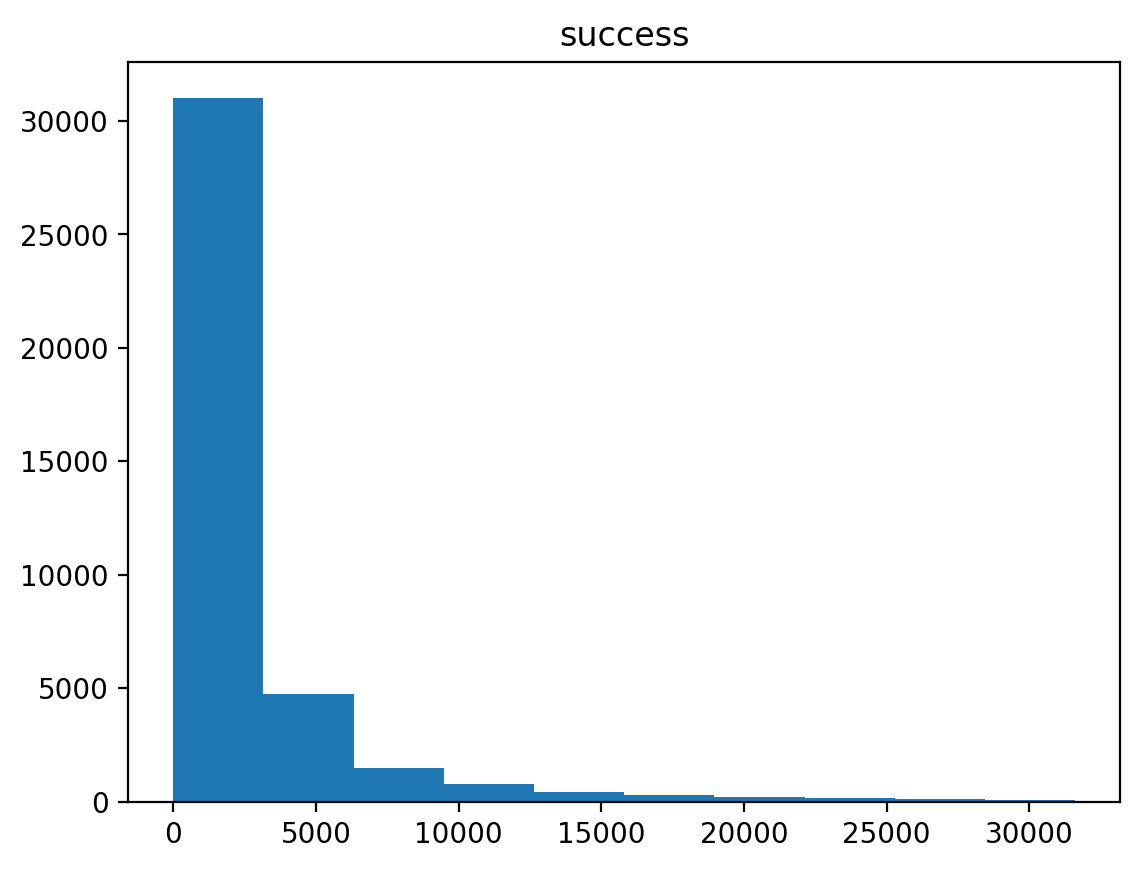

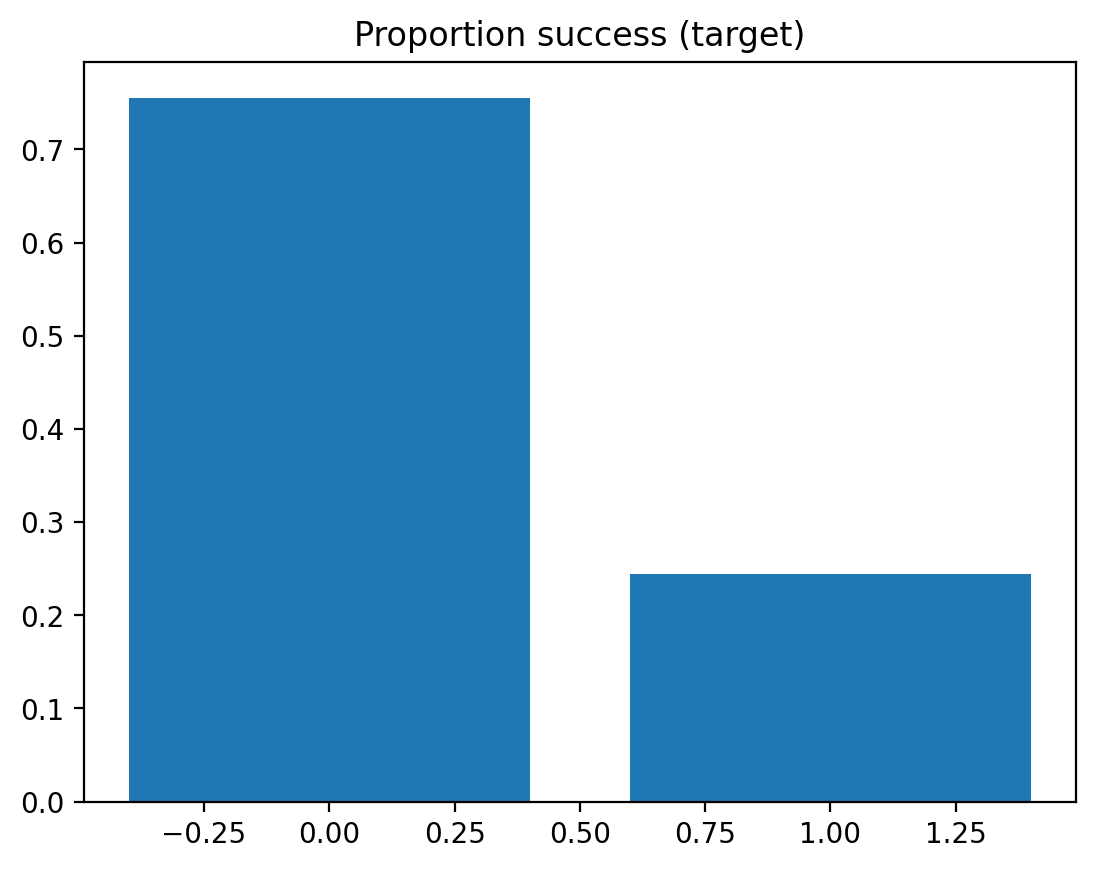

In [19]:
#df['shares'].plot(kind='hist', bins=10)
plt.hist(df['shares'])
plt.title("success")
plt.show()

## Target
target = "success"
df[target]= (df["shares"] > df["shares"].quantile(.75))*1

data_plot = pd.DataFrame(df['success'].value_counts(1)).reset_index()

plt.bar(data=data_plot, 
        height='proportion',
        x='success')
plt.title('Proportion success (target)')
plt.show()

## Scoring

In [20]:
for var in ls_cont:
    df[f"C_{var}"] = pd.cut(df[var], bins=5).astype(str)
df.filter(like='C_').head()

,C_timedelta,C_n_tokens_title,C_n_tokens_content,C_n_unique_tokens,C_n_non_stop_words,C_n_non_stop_unique_tokens,C_num_hrefs,C_num_self_hrefs,C_num_imgs,C_num_videos,C_average_token_length,C_num_keywords,C_data_channel_is_lifestyle,C_data_channel_is_entertainment,C_data_channel_is_bus,C_data_channel_is_socmed,C_data_channel_is_tech,C_data_channel_is_world,C_kw_min_min,C_kw_max_min,C_kw_avg_min,C_kw_min_max,C_kw_max_max,C_kw_avg_max,C_kw_min_avg,C_kw_max_avg,C_kw_avg_avg,C_self_reference_min_shares,C_self_reference_max_shares,C_self_reference_avg_sharess,C_weekday_is_monday,C_weekday_is_tuesday,C_weekday_is_wednesday,C_weekday_is_thursday,C_weekday_is_friday,C_weekday_is_saturday,C_weekday_is_sunday,C_is_weekend,C_LDA_00,C_LDA_01,C_LDA_02,C_LDA_03,C_LDA_04,C_global_subjectivity,C_global_sentiment_polarity,C_global_rate_positive_words,C_global_rate_negative_words,C_rate_positive_words,C_rate_negative_words,C_avg_positive_polarity,C_min_positive_polarity,C_max_positive_polarity,C_avg_negative_polarity,C_min_negative_polarity,C_max_negative_polarity,C_title_subjectivity,C_title_sentiment_polarity,C_abs_title_subjectivity,C_abs_title_sentiment_polarity
0,"(586.4, 731.0]","(10.4, 14.6]","(-8.474, 1694.8]","(0.6, 0.8]","(0.8, 1.0]","(0.8, 1.0]","(-0.304, 60.8]","(-0.116, 23.2]","(-0.128, 25.6]","(-0.091, 18.2]","(3.217, 4.825]","(4.6, 6.4]","(-0.001, 0.2]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-1.378, 74.6]","(-298.4, 59680.0]","(-43.829, 8564.771]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-4.614, 721.808]","(-298.4, 59680.0]","(-43.568, 8713.532]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(0.382, 0.563]","(0.2, 0.381]","(0.0173, 0.199]","(0.0173, 0.2]","(0.0173, 0.2]","(0.4, 0.6]","(0.0549, 0.279]","(0.0311, 0.0622]","(-0.000185, 0.037]","(0.6, 0.8]","(0.2, 0.4]","(0.2, 0.4]","(-0.001, 0.2]","(0.6, 0.8]","(-0.4, -0.2]","(-0.8, -0.6]","(-0.4, -0.2]","(0.4, 0.6]","(-0.2, 0.2]","(-0.0005, 0.1]","(-0.001, 0.2]"
1,"(586.4, 731.0]","(6.2, 10.4]","(-8.474, 1694.8]","(0.6, 0.8]","(0.8, 1.0]","(0.6, 0.8]","(-0.304, 60.8]","(-0.116, 23.2]","(-0.128, 25.6]","(-0.091, 18.2]","(4.825, 6.433]","(2.8, 4.6]","(-0.001, 0.2]","(-0.001, 0.2]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-1.378, 74.6]","(-298.4, 59680.0]","(-43.829, 8564.771]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-4.614, 721.808]","(-298.4, 59680.0]","(-43.568, 8713.532]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(0.745, 0.927]","(0.0173, 0.2]","(0.0173, 0.199]","(0.0173, 0.2]","(0.0173, 0.2]","(0.2, 0.4]","(0.0549, 0.279]","(0.0311, 0.0622]","(-0.000185, 0.037]","(0.6, 0.8]","(0.2, 0.4]","(0.2, 0.4]","(-0.001, 0.2]","(0.6, 0.8]","(-0.2, 0.0]","(-0.2, 0.0]","(-0.2, 0.0]","(-0.001, 0.2]","(-0.2, 0.2]","(0.4, 0.5]","(-0.001, 0.2]"
2,"(586.4, 731.0]","(6.2, 10.4]","(-8.474, 1694.8]","(0.4, 0.6]","(0.8, 1.0]","(0.6, 0.8]","(-0.304, 60.8]","(-0.116, 23.2]","(-0.128, 25.6]","(-0.091, 18.2]","(3.217, 4.825]","(4.6, 6.4]","(-0.001, 0.2]","(-0.001, 0.2]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-1.378, 74.6]","(-298.4, 59680.0]","(-43.829, 8564.771]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-4.614, 721.808]","(-298.4, 59680.0]","(-43.568, 8713.532]","(-843.3, 168660.0]","(-843.3, 168660.0]","(-843.3, 168660.0]","(0.8, 1.0]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(0.2, 0.382]","(0.0173, 0.2]","(0.0173, 0.199]","(0.0173, 0.2]","(0.564, 0.745]","(0.6, 0.8]","(0.279, 0.504]","(0.0311, 0.0622]","(-0.000185, 0.037]","(0.8, 1.0]","(-0.001, 0.2]","(0.4, 0.6]","(-0.001, 0.2]","(0.8, 1.0]"

In [21]:
def IV(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux["IV"] = (aux["%no_evento"] - aux["%evento"])*aux["WOE"]
    return aux["IV"].sum()

In [22]:
new_disc = [x for x in df.columns if x.startswith("C_")]
len(new_disc)

59

In [23]:
df_iv = pd.DataFrame(columns=["iv"])
for var in new_disc:
    df_iv.loc[var, "iv"] = IV(df = df, var = var, tgt = target)

df_iv.sort_values(by = "iv", ascending = False)

/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,iv
C_kw_max_avg,inf
C_kw_max_max,inf
C_kw_avg_min,inf
C_kw_max_min,inf
C_num_hrefs,inf
C_num_self_hrefs,inf
C_kw_min_min,inf
C_self_reference_max_shares,inf
C_kw_min_avg,0.13
C_LDA_02,0.10


In [24]:
ls_best = df_iv[df_iv["iv"] != np.inf].sort_values(by = "iv", ascending=False).head(5).index
ls_best

Index(['C_kw_min_avg', 'C_LDA_02', 'C_data_channel_is_world', 'C_LDA_03',
       'C_global_subjectivity'],
      dtype='object')

In [25]:
def WOE(df, var, tgt):
    aux = df[[var, tgt]].groupby(var).agg(["count", "sum"])
    aux["evento"] = aux[tgt, "sum"]
    aux["no_evento"] = aux[tgt, "count"] - aux[tgt, "sum"]
    aux["%evento"] = aux["evento"] / aux["evento"].sum()
    aux["%no_evento"] = aux["no_evento"] / aux["no_evento"].sum()
    aux["WOE"] = np.log(aux["%no_evento"] / aux["%evento"])
    aux.columns = aux.columns.droplevel(1)
    aux = aux[["WOE"]].reset_index().rename(columns={"WOE": f"W_{var}"})
    df = df.merge(aux, on = var, how = "left")
    return df

In [26]:
for var in ls_best:
    df = WOE(df = df, var = var, tgt = target)

df.filter(like='W_C_').head()

,W_C_kw_min_avg,W_C_LDA_02,W_C_data_channel_is_world,W_C_LDA_03,W_C_global_subjectivity
0,0.04,-0.16,-0.14,0.16,-0.06
1,0.04,-0.16,-0.14,0.16,0.38
2,0.04,-0.16,-0.14,0.16,-0.47
3,0.04,0.17,-0.14,0.16,-0.06
4,0.04,-0.16,-0.14,0.16,-0.06


In [27]:
ls_woe = [x for x in df.columns if x.startswith("W_")]
df[ls_woe].head()

,W_C_kw_min_avg,W_C_LDA_02,W_C_data_channel_is_world,W_C_LDA_03,W_C_global_subjectivity
0,0.04,-0.16,-0.14,0.16,-0.06
1,0.04,-0.16,-0.14,0.16,0.38
2,0.04,-0.16,-0.14,0.16,-0.47
3,0.04,0.17,-0.14,0.16,-0.06
4,0.04,-0.16,-0.14,0.16,-0.06


In [28]:
df[ls_woe].describe()

,W_C_kw_min_avg,W_C_LDA_02,W_C_data_channel_is_world,W_C_LDA_03,W_C_global_subjectivity
count,"39,246.00","39,246.00","39,246.00","39,246.00","39,246.00"
mean,0.03,0.03,0.03,0.01,0.01
std,0.36,0.35,0.31,0.22,0.22
min,-0.69,-0.16,-0.14,-0.42,-0.47
25%,0.04,-0.16,-0.14,-0.12,-0.06
50%,0.04,-0.16,-0.14,0.16,-0.06
75%,0.13,-0.03,-0.14,0.16,-0.06
max,0.65,0.88,0.62,0.16,0.38


## Modelo

In [29]:
# datasets
X = df[ls_woe]
y = df[target]

# Model
logreg = LogisticRegression()

# Fit model
logreg.fit(X, y)

# score 
logreg.score(X, y)

0.7556184069714111

In [30]:
ls_res = cross_val_score(estimator=logreg, 
                         cv=4, 
                         scoring="roc_auc", 
                         X=X, 
                         y=y, 
                         n_jobs=-1)

print(ls_res)
print(f"mean: {np.mean(ls_res)}")
print(f"std: {np.std(ls_res)}")


[0.59060795 0.62283405 0.63548225 0.65332441]
mean: 0.625562161116936
std: 0.022904094590998784


## Score

* __Factor__ = $\frac{PDO}{ln(2)}$
* __PDO__ : Points Double Odds
* __offset__ = $score - factor*ln(odds)$ 
* __score__ : Punto para fijar odds de referencia
* __puntos__ = $ (-WoE*\beta + \frac{\alpha}{n})*factor + \frac{offset}{n}$


In [31]:
pdo = 30
base_score = 200 #"Media"
base_odds = 50 #"Varianza"
factor = pdo/np.log(2)
offset = base_score - (factor - np.log(base_odds))
m = len(ls_woe)

In [32]:
alpha = logreg.intercept_
betas = logreg.coef_[0]
print(alpha)
print(betas)

[-1.12850622]
[-0.78413086 -0.51723589 -0.23155489 -0.35503854 -0.55638391]


In [33]:
for feat, beta in zip(ls_woe, betas):
    df["P_" + feat[2:]] = df[feat].apply(lambda x:((-beta*x + (alpha/m))*factor) + (offset/m)).astype(int)

df[ls_woe].head()

,W_C_kw_min_avg,W_C_LDA_02,W_C_data_channel_is_world,W_C_LDA_03,W_C_global_subjectivity
0,0.04,-0.16,-0.14,0.16,-0.06
1,0.04,-0.16,-0.14,0.16,0.38
2,0.04,-0.16,-0.14,0.16,-0.47
3,0.04,0.17,-0.14,0.16,-0.06
4,0.04,-0.16,-0.14,0.16,-0.06


In [44]:
df["score"] = df[[x for x in df.columns if x.startswith("P_")]].sum(axis = 1)
P_cols = df.filter(like='P_').columns.to_list()
P_cols = P_cols + ["score"]
df[P_cols].head()

,P_C_kw_min_avg,P_C_LDA_02,P_C_data_channel_is_world,P_C_LDA_03,P_C_global_subjectivity,score
0,23,18,20,24,20,105
1,23,18,20,24,31,116
2,23,18,20,24,11,96
3,23,26,20,24,20,113
4,23,18,20,24,20,105


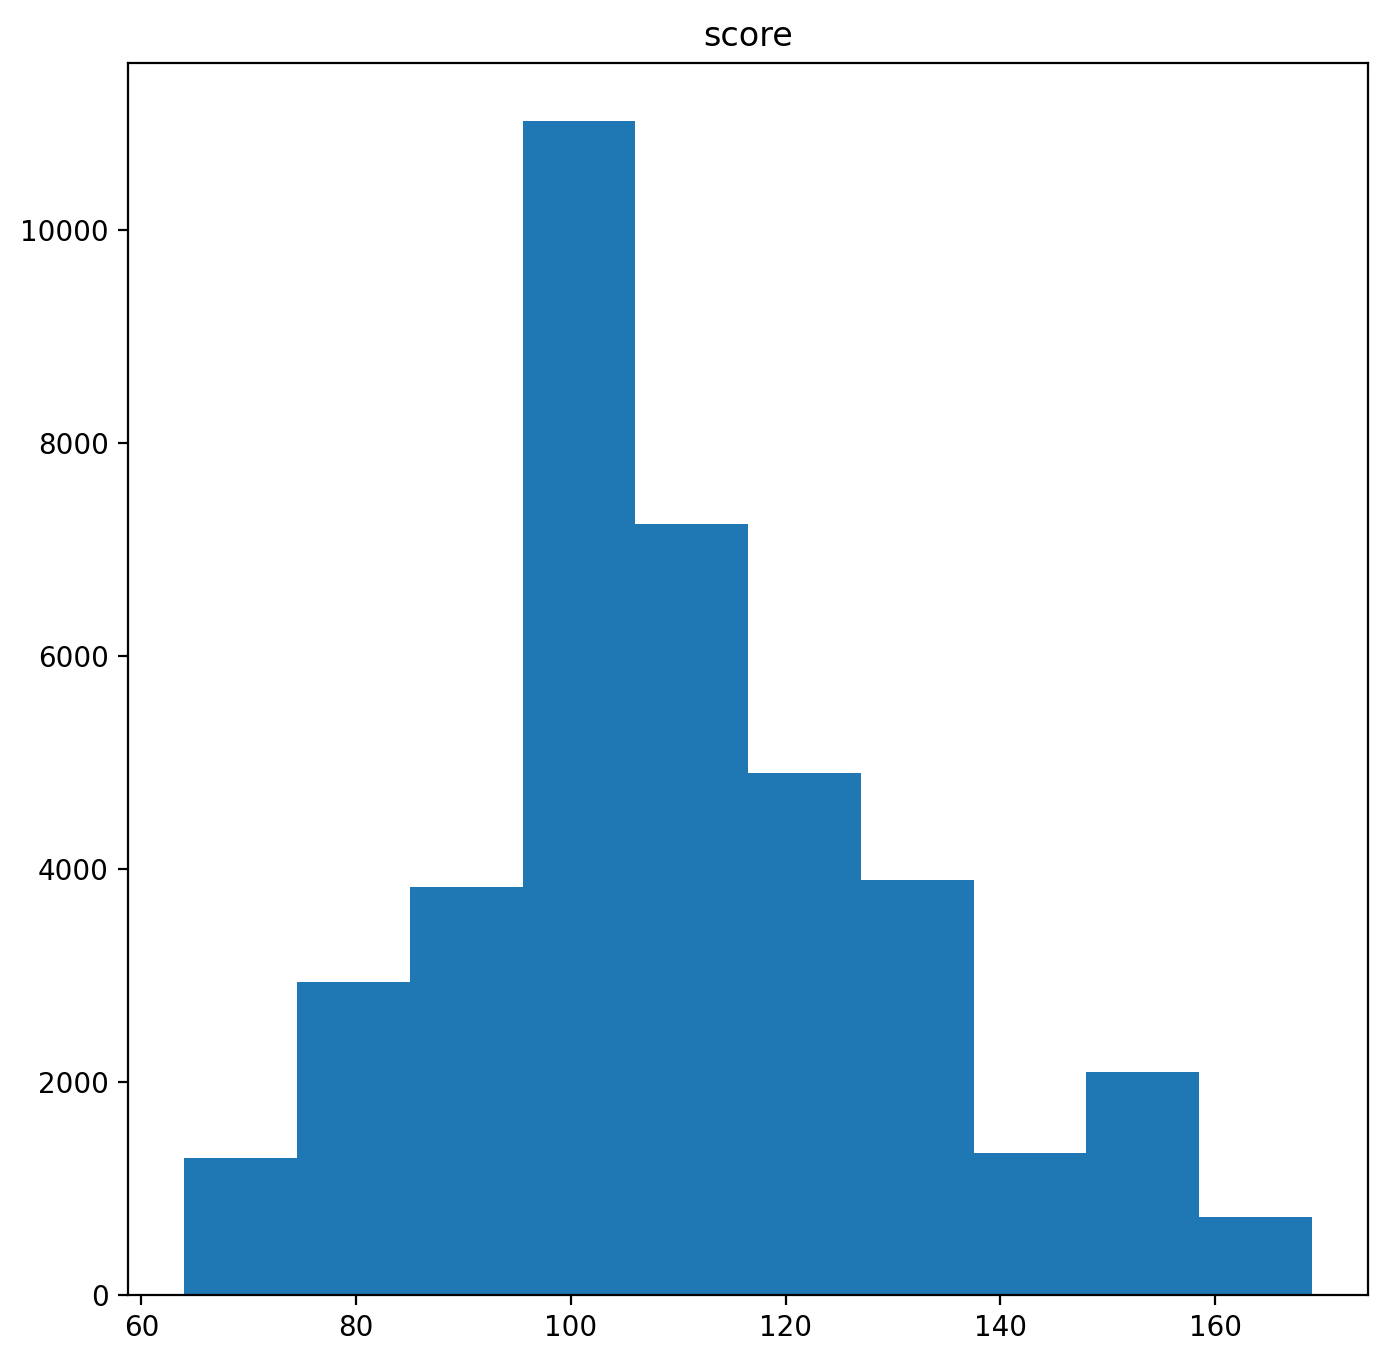

In [36]:
plt.figure(figsize=(8, 8))
plt.hist(df["score"], bins=10)
plt.title("score")
plt.show()

In [37]:
ls_best_raw = [x[2:] for x in ls_best]
ls_best_raw

['kw_min_avg',
 'LDA_02',
 'data_channel_is_world',
 'LDA_03',
 'global_subjectivity']

In [38]:
for var in ls_best:
    display(df[[var, "P_" + var]].groupby(var).last())

,P_C_kw_min_avg
C_kw_min_avg,
"(-4.614, 721.808]",23
"(1444.616, 2167.424]",26
"(2167.424, 2890.232]",9
"(2890.232, 3613.04]",0
"(721.808, 1444.616]",44


,P_C_LDA_02
C_LDA_02,
"(0.0173, 0.199]",18
"(0.199, 0.379]",21
"(0.379, 0.559]",26
"(0.559, 0.74]",36
"(0.74, 0.92]",42


,P_C_data_channel_is_world
C_data_channel_is_world,
"(-0.001, 0.2]",20
"(0.8, 1.0]",28


,P_C_LDA_03
C_LDA_03,
"(0.0173, 0.2]",24
"(0.2, 0.382]",20
"(0.382, 0.563]",15
"(0.563, 0.745]",16
"(0.745, 0.927]",17


,P_C_global_subjectivity
C_global_subjectivity,
"(-0.001, 0.2]",14
"(0.2, 0.4]",31
"(0.4, 0.6]",20
"(0.6, 0.8]",11
"(0.8, 1.0]",20
